In [303]:
#import igraph
#from igraph import *
import matplotlib.pyplot as plt
import networkx as nx



In [304]:
#g = nx.erdos_renyi_graph(10, 0.5)
#nx.write_gml(g, '/home/dheeraj/my_projects/my_project_env/practice/6th_sem_Academics/SocialNetworkAnalysis/HandsOn/Modeling_cascading/main_graph.gml')

In [305]:
#def set_all_B(g):
#    for each in g.nodes():
#        g.nodes[each]['action'] = 'B'

In [306]:
#def set_A(g, list1):
#    for each in list1:
#        g.nodes[each]['action'] ='A'

In [307]:
def get_colors(g):
    list1=[]
    for each in g.nodes():
        if g.nodes[each]['action']=='B':
            list1.append('red')
        else:
            list1.append('green')
    return list1

In [308]:
def find_neigh(each, c, g):
    num=0
    for each1 in g.neighbors(each):
        if g.nodes[each1]['action']==c:
            num=num+1
    return num

In [309]:
def recalculate_options(g):
    dict1= {}
    #Payoff(A) =a=4
    #Payoff(B) =b=3
    a=4
    b=3
    for each in g.nodes():
        num_A = find_neigh(each, 'A', g)
        num_B = find_neigh(each, 'B', g)
        payoff_A=a*num_A
        payoff_B=b*num_B
        if payoff_A >= payoff_B:
            dict1[each]='A'
        else:
            dict1[each]= 'B'
    return dict1
    
    
    

In [310]:
def reset_node_attributes(g, action_dict):
    for each in action_dict:
        g.nodes[each]['action']= action_dict[each]

In [311]:
def terminate_1(c, g):
    f=1
    for each in g.nodes():
        if g.nodes[each]['action']!=c:
            f=0
            break
    return f

In [312]:
def terminate(g, count):
    flag1=terminate_1('A', g)
    flag2=terminate_1('B',g)
    if flag1==1 or flag2==1 or count>=100:
        return 1
    else:
        return 0

In [313]:
#g = nx.read_gml('/home/dheeraj/my_projects/my_project_env/practice/6th_sem_Academics/SocialNetworkAnalysis/HandsOn/Modeling_cascading/main_graph.gml')

In [314]:
#nx.draw(g, with_labels=True)

In [315]:
#set_all_B(g)

In [316]:
#list1=[2,5]

In [317]:
#colors= get_colors(g)

In [318]:
#nx.draw(g, node_color = colors, node_size=800, with_labels=True)
#plt.show()

In [319]:
g = nx.erdos_renyi_graph(10, 0.5)

In [320]:
#g = nx.parse_edgelist('/home/dheeraj/my_projects/my_project_env/practice/6th_sem_Academics/SocialNetworkAnalysis/HandsOn/Modeling_cascading/mygraph.csv')

In [321]:

action1 = "A"
action2 = "B"
for each in g.nodes():
    g.nodes[each]['action'] = action2

In [322]:
list1 = [3,7]

In [323]:
for each in list1:
    g.nodes[each]['action'] = action1 

In [324]:
g.nodes[3]

{'action': 'A'}

In [325]:
colors = get_colors(g)

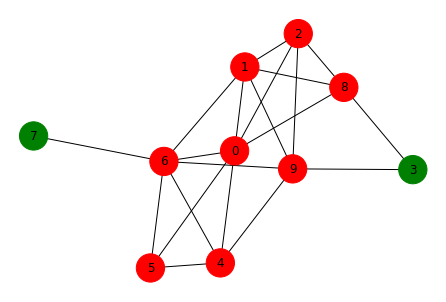

In [326]:
nx.draw(g,node_color= colors , node_size=800,with_labels=True)
plt.show()

In [327]:

#action_dict  = recalculate_options(g)


In [328]:
#reset_node_attributes(g, action_dict)

In [329]:
#colors = get_colors(g)

In [330]:
#nx.draw(g,node_color= colors , node_size=800,with_labels=True)
#plt.show()

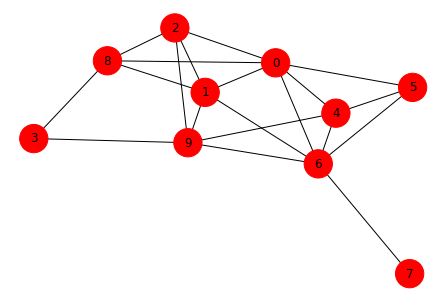

In [331]:
flag =0
count =0
while(1):
    flag = terminate(g, count)
    if flag==1:
        break
    count = count+1
    action_dict  = recalculate_options(g)
    reset_node_attributes(g, action_dict)
    colors = get_colors(g)

c = is_complete_cascade(g)

nx.draw(g,node_color= colors , node_size=800,with_labels=True)
plt.show()